In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import pandas_datareader.data as web
import quandl
import datetime as dt
import seaborn as sns          
sns.set()

In [2]:
start = dt.datetime(2001, 1, 20)
end = dt.datetime.now()

In [3]:
df = web.DataReader("^GSPC", 'yahoo', start, end)
df.rename(columns={'Adj Close': "SP500"}, inplace=True)
df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

In [4]:
df_Silver = quandl.get("PERTH/SLVR_USD_D", authtoken="EnterYourTokenHere")
df = df.merge(df_Silver, left_on='Date', right_on='Date')
df.rename(columns={'Ask Average': "Silver"}, inplace=True)
df.drop(['Bid High', 'Ask High', 'Bid Low', 'Ask Low', 'Bid Average', '6 Month Gold Lease Rates (%PA)'], 1, inplace=True)

In [5]:
normalized_df=(df-df.min())/(df.max()-df.min())

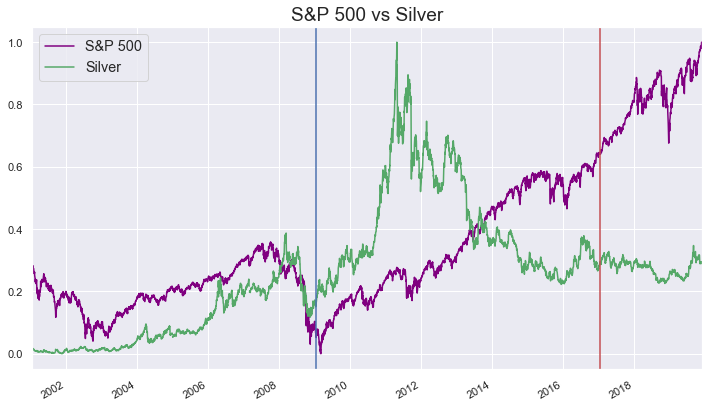

In [6]:
normalized_df['SP500'].plot(color='purple', label='S&P 500')
normalized_df['Silver'].plot(figsize=(12, 7), color='g', label='Silver')

plt.legend(loc="upper left", fontsize='x-large');
# Start date is beginning of Bush. Blue line is start of Obama. Red line is start of Trump
plt.axvline(dt.datetime(2009, 1, 20), color='b')
plt.axvline(dt.datetime(2017, 1, 20), color='r')
plt.title('S&P 500 vs Silver', fontsize=19)
# plt.yticks([])
plt.xlabel('')
plt.plot();
# plt.savefig('SP500vsSilver')

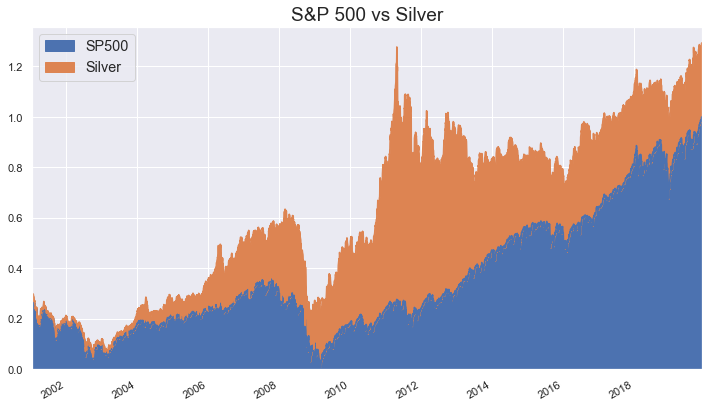

In [11]:
df = pd.DataFrame(normalized_df, columns=['SP500', 'Silver'])
df.plot.area(figsize=(12, 7), stacked=True);
plt.xlabel('');
plt.title('S&P 500 vs Silver', fontsize=19)
plt.legend(loc="upper left", fontsize='x-large');